___
# PROJETO 1

## <font color='red'>Victor Hugo Leal Vieira da Silva</font>
___

## <font color='blue'>Disparidade entre os gêneros de aposentados</font>

## Introdução

Essa análise irei investigar as diferenças entre os gêneros dos aposentados. Tentarei expor o motivo do aumento ou diminuição do número de aposentados de 2001 e 2014 através das suas rendas.


## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from numpy import arange
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\VictorHugo\Desktop


#### Para a minha análise dos dados, utilizei  duas diferentes base de dados(PNAD), equivalente aos anos de 2001 e 2014.

In [4]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados2014 = pd.read_csv('PES2014.csv', sep=',')
dados1992 = pd.read_csv('PES1992.csv', sep=',')
dados2001 = pd.read_csv('PES2001.csv', sep=',')

#### Antes de iniciar a análise, propriamente dita, é impressindível a nomeação das categorias a ser estudadas: 

In [5]:
dados2014.V9122 = dados2014.V9122.astype('category')
dados2014.V9122.cat.categories = ("Aposentado", "Não aposentado")

dados2001.v9122 = dados2001.v9122.astype('category')
dados2001.v9122.cat.categories = ( "Não declarado", "Aposentado", "Não aposentado")

dados2014.V9118 = dados2014.V9118.astype('category')
dados2014.V9118.cat.categories = ("Sim", "Não")

dados2014.V9112 = dados2014.V9112.astype('category')
dados2014.V9112.cat.categories = (  "Empregado",
                                "Trabalhador doméstico",
                                "Conta própria",
                                "Empregador",
                                "Trabalhador não remunerado membro da unidade domiciliar",
                                "Outro trabalhador não remunerado",
                                "Trabalhador na produção para o próprio consumo",
                                "Trabalhador na construção para o próprio uso",)


dados2001.v9112 = dados2001.v9112.astype('category')
dados2001.v9112.cat.categories = (  'Outros',
                                  "Empregado",
                                "Trabalhador doméstico",
                                "Conta própria",
                                "Empregador",
                                "Trabalhador não remunerado membro da unidade domiciliar",
                                "Outro trabalhador não remunerado",
                                "Trabalhador na produção para o próprio consumo",
                                "Trabalhador na construção para o próprio uso",
                                 "Ignorado")


dados2014.V0302 = dados2014.V0302.astype('category')
dados2014.V0302.cat.categories = ("Masculino", "Feminino")

dados2001.v0302 = dados2001.v0302.astype('category')
dados2001.v0302.cat.categories = ("Outro", "Masculino", "Feminino")


#### A análise será feita, inicialmente, com base das diferenças de gêneros. Ou seja, iremos distinguir algumas diferenças entre os aposentados do sexo feminino e masculino bem como algumas caracteristicas do grupo dos aposentados.

A seguir é filtrado nas PNAD's os grupos dos Aposentados Masculinos e Aposentados Femininos: 

In [6]:
Homens = dados2014[(dados2014['V9122'] == "Aposentado") & (dados2014['V0302'] == "Masculino")]
Mulher = dados2014[(dados2014['V9122'] == "Aposentado") & (dados2014['V0302'] == "Feminino")]

Homens2001 = dados2001[(dados2001['v9122'] == "Aposentado") & (dados2001['v0302'] == "Masculino")]
Mulher2001 = dados2001[(dados2001['v9122'] == "Aposentado") & (dados2001['v0302'] == "Feminino")]

#### Antes de iniciarmos a análise, a tabela abaixo referente ao ano de 2014 demonstra que a imensa massa de entrevistados responderam se eram aposentados ou não, portanto podemos desconsiderar os Não Declarados.

In [13]:
dados2001.v9122.value_counts()
#dados2001.v0302.value_counts()

npa = pd.crosstab(dados2001.v9122, dados2001.v0302)
npa

v0302,Outro,Masculino,Feminino
v9122,,,
Não declarado,0,3,1
Aposentado,0,16054,13921
Não aposentado,0,149949,163297


#### A primeira pergunta da análise será: Há muitos aposentados que estão a procura de emprego?
Para responder a essa pergunta utilizamos o gráfico de barras para ilustrar a tabela de aposentadoria por procura de emprego.
Em um total de 311.761 aposentados, temos que apenas 121 estão a procura de emprego. Veremos a seguir que muitos dos demais aposentados trabalham!

Foi omitidos duas linhas de código que serviram apenas para cálculo, não acrescentará na interpretação do gráfico de barras.


C:\Users\VictorHugo\Anaconda3\lib\site-packages\pandas\core\internals.py:3253: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  block = self.blocks[self._blknos[i]]


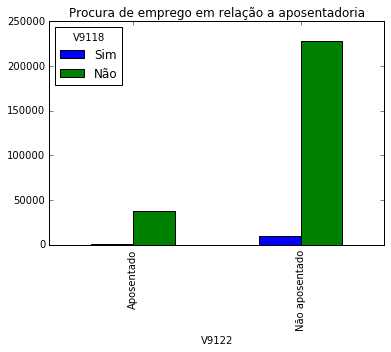

In [45]:
AposentadosxProcura= pd.crosstab (dados2014.V9122, dados2014.V9118)
AposentadosxProcura.plot(kind='bar', color=('blue', 'green'), title = 'Procura de emprego em relação a aposentadoria')

#AposentadosxProcura.min()
#dados2014.V9122.value_counts()

#### Então surgiu a dúvida, será que os aposentados são desempregados ou possuem um emprego para complementar a renda da aposentadoria?
Para solucionar nossa dúvida, o gráfico a baixo foi feito com base na variável "empregos no ano que foi realizada a pesquisa (PNAD)" e nos aposentados e não aposentados.
A partir da programação temos que 2.508 aposentados possuem a categoria de "Empregados".

V9122
Aposentado        2508
Não aposentado    8020
dtype: int64

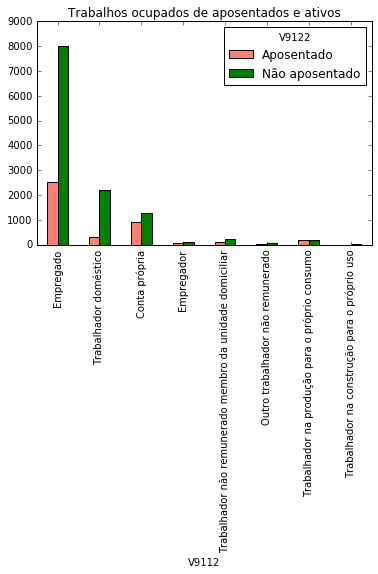

In [49]:
AposentadosxUltimoTrabalho= pd.crosstab (dados2014.V9112, dados2014.V9122)
AposentadosxUltimoTrabalho.plot(kind='bar', color=('salmon', 'green'), title = 'Trabalhos ocupados de aposentados e ativos')

#AposentadosxUltimoTrabalho.max()

 Como inicialmente desejamos observar as diferenças entre os gêneros, foi separado o gráfico acima, que indica a população total de aposentados, em dois outros gráficos, cada um mostrando a população de aposentados masculina e feminina, respectivamente.
 
 #### Portanto temos os gráficos:

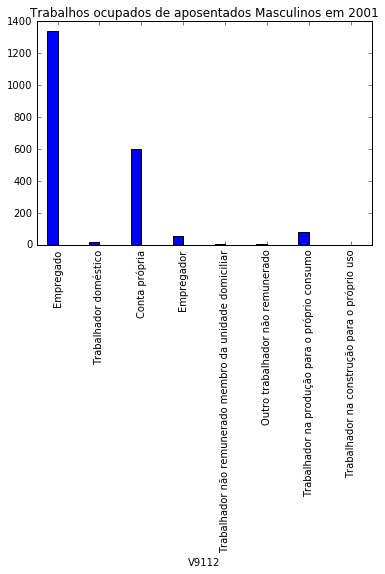

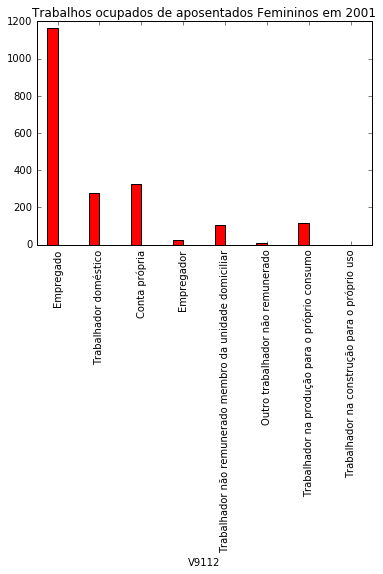

In [57]:
AposentadosxUltimoTrabalhoM= pd.crosstab(Homens.V9112, Homens.V9122)
AposentadosxUltimoTrabalhoM.plot(legend = False, kind='bar', color=('blue'), title = 'Trabalhos ocupados de aposentados Masculinos em 2001')

AposentadosxUltimoTrabalhoF= pd.crosstab(Mulher.V9112, Mulher.V9122)
plot = AposentadosxUltimoTrabalhoF.plot(legend = False, kind='bar', color=('red'), title = 'Trabalhos ocupados de aposentados Femininos em 2001')


In [11]:
Diferenca2014 = list()
Tipos = ('Empregado',"Trabalhador doméstico", 'Conta própria', 'Empregador', 'Trabalhador não remunerado membro da unidade domiciliar',  
        'Outro trabalhador não remunerado', 'Trabalhador na produção para o próprio consumo', 'Trabalhador na construção para o próprio uso')

empregadosH = Homens.V9112[(Homens.V9112 == 'Empregado')]
empregadosM = Mulher.V9112[(Mulher.V9112 == 'Empregado')]

domesticoH = Homens.V9112[(Homens.V9112 == "Trabalhador doméstico")]
domesticoM = Mulher.V9112[(Mulher.V9112 == "Trabalhador doméstico")]

propriaH = Homens.V9112[(Homens.V9112 == 'Conta própria')]
propriaM = Mulher.V9112[(Mulher.V9112 == 'Conta própria')]

empregadorH = Homens.V9112[(Homens.V9112 == 'Empregador')]
empregadorM = Mulher.V9112[(Mulher.V9112 == 'Empregador')]

remuneradoH = Homens.V9112[(Homens.V9112 == 'Trabalhador não remunerado membro da unidade domiciliar')]
remuneradoM = Mulher.V9112[(Mulher.V9112 == 'Trabalhador não remunerado membro da unidade domiciliar')]

outroH = Homens.V9112[(Homens.V9112 == 'Outro trabalhador não remunerado')]
outroM = Mulher.V9112[(Mulher.V9112 == 'Outro trabalhador não remunerado')]

consumoH = Homens.V9112[(Homens.V9112 == 'Trabalhador na produção para o próprio consumo')]
consumoM = Mulher.V9112[(Mulher.V9112 == 'Trabalhador na produção para o próprio consumo')]

construcaoH = Homens.V9112[(Homens.V9112 == 'Trabalhador na construção para o próprio uso')]
construcaoM = Mulher.V9112[(Mulher.V9112 == 'Trabalhador na construção para o próprio uso')]

Diferenca2014.append(len(empregadosH) - len(empregadosM))
Diferenca2014.append(len(domesticoH) - len(domesticoM))
Diferenca2014.append(len(propriaH) - len(propriaM))
Diferenca2014.append(len(empregadorH) - len(empregadorM))
Diferenca2014.append(len(remuneradoH) - len(remuneradoM))
Diferenca2014.append(len(outroH) - len(outroM))
Diferenca2014.append(len(consumoH) - len(consumoM))
Diferenca2014.append(len(construcaoH) - len(construcaoM))


#### Afim de representar melhor as disparidades entre os gêneros, o gráfico abaixo ilustra a diferença ( matematicamente falando ) entre homens e mulher nos diversos empregos. 

Os valores positivos representados no gráfico indica que nesse trabalho os homens possuem mais quantidade. Em oposição, os valores negativos indicam que as mulheres estão em maior quantidade. Os valores apresentados no eixo vertical do gráfico são valores reais.
É percebido, através do gráfico que os homens sao preponderantes em seis de nove trabalhos.

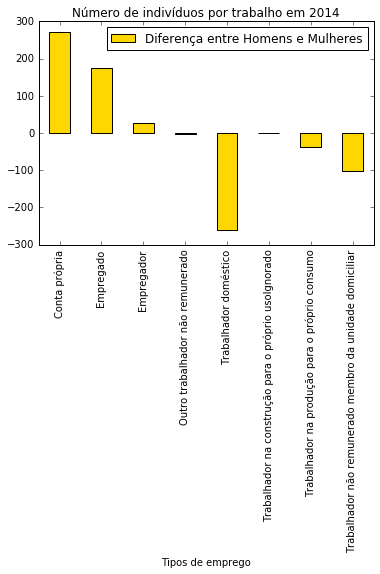

In [58]:
Tabela = list(zip(Tipos,Diferenca2014))
df = pd.DataFrame(data = Tabela, columns=['Tipos de emprego', 'Diferença entre Homens e Mulheres'])
df['Tipos de emprego'].unique()
name = df.groupby('Tipos de emprego')

df = name.sum()
df

df.plot(kind = 'bar' , color = 'gold', title = "Número de indivíduos por trabalho em 2014")

#### Para observarmos se houve uma melhora na quantidade de aposentados, iremos compará-los com os aposentados de 2001.
O sistema de implementação dos gráficos é muito similar, portanto não é necessário citar.

In [ ]:
AposentadosxUltimoTrabalhoM2001= pd.crosstab(Homens2001.v9112, Homens2001.v9122)
AposentadosxUltimoTrabalhoM2001.plot(legend = F

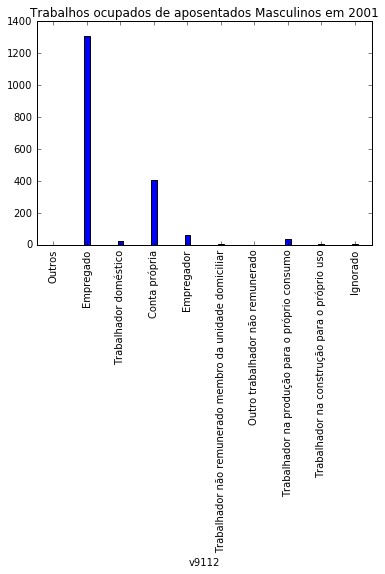

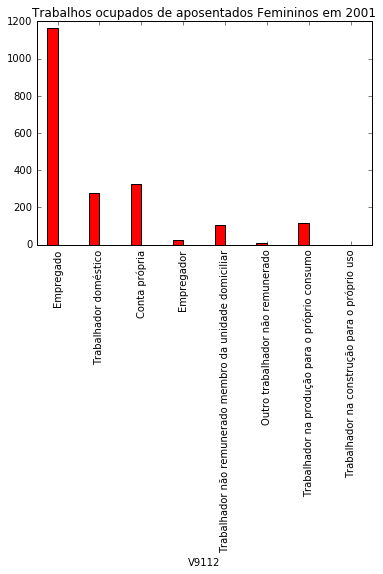

In [54]:
alse, kind='bar', color=('blue'), title = 'Trabalhos ocupados de aposentados Masculinos em 2001')

AposentadosxUltimoTrabalhoF= pd.crosstab(Mulher.V9112, Mulher.V9122)
AposentadosxUltimoTrabalhoF.plot(legend = False, kind='bar', color=('red'), title = 'Trabalhos ocupados de aposentados Femininos em 2001')

Nesse momento iremos novamente fazer um gráfico com as diferenças entre as populações de 2001.

In [15]:
Diferenca1992 = list()
Tipos = ('Empregado',"Trabalhador doméstico", 'Conta própria', 'Empregador', 'Trabalhador não remunerado membro da unidade domiciliar',  
        'Outro trabalhador não remunerado', 'Trabalhador na produção para o próprio consumo', 'Trabalhador na construção para o próprio uso'
         'Ignorado')

IgnoradoH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Ignorado')]
IgnoradoM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Ignorado')]

empregadosH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Empregado')]
empregadosM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Empregado')]

domesticoH1992 = Homens2001.v9112[(Homens2001.v9112 == "Trabalhador doméstico")]
domesticoM1992 = Mulher2001.v9112[(Mulher2001.v9112 == "Trabalhador doméstico")]

propriaH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Conta própria')]
propriaM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Conta própria')]

empregadorH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Empregador')]
empregadorM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Empregador')]

remuneradoH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Trabalhador não remunerado membro da unidade domiciliar')]
remuneradoM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Trabalhador não remunerado membro da unidade domiciliar')]

outroH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Outro trabalhador não remunerado')]
outroM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Outro trabalhador não remunerado')]

consumoH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Trabalhador na produção para o próprio consumo')]
consumoM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Trabalhador na produção para o próprio consumo')]

construcaoH1992 = Homens2001.v9112[(Homens2001.v9112 == 'Trabalhador na construção para o próprio uso')]
construcaoM1992 = Mulher2001.v9112[(Mulher2001.v9112 == 'Trabalhador na construção para o próprio uso')]

Diferenca1992.append(len(empregadosH1992) - len(empregadosM1992))
Diferenca1992.append(len(domesticoH1992) - len(domesticoM1992))
Diferenca1992.append(len(propriaH1992) - len(propriaM1992))
Diferenca1992.append(len(empregadorH1992) - len(empregadorM1992))
Diferenca1992.append(len(remuneradoH1992) - len(remuneradoM1992))
Diferenca1992.append(len(outroH1992) - len(outroM1992))
Diferenca1992.append(len(consumoH1992) - len(consumoM1992))
Diferenca1992.append(len(construcaoH1992) - len(construcaoM1992))
Diferenca1992.append(len(IgnoradoH1992) - len(IgnoradoM1992))


#### É de extrema importância, nao apenas no gráfico abaixo como no anterior resaltar a diferença entre as grandesas dos eixos. Pois embora similares na figura, seus eixos demonstram disparidades numéricas.

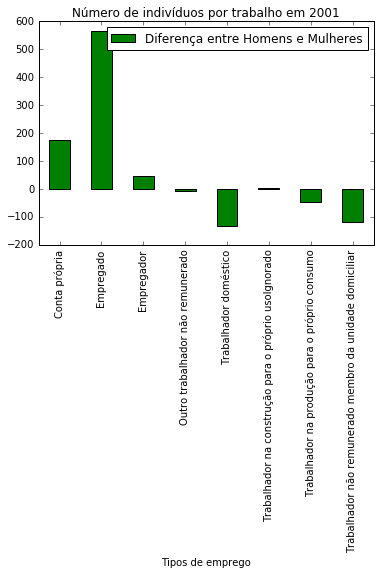

In [60]:
Tabela2 = list(zip(Tipos,Diferenca1992))
df2 = pd.DataFrame(data = Tabela2, columns=['Tipos de emprego', 'Diferença entre Homens e Mulheres'])
df2['Tipos de emprego'].unique()
name = df2.groupby('Tipos de emprego')

df2 = name.sum()
df2
df2.plot(kind = 'bar' , color = 'green', title = "Número de indivíduos por trabalho em 2001")


Felizmente é notável que de 2001 para 2014 o número de aposentados empregados diminuiu aproximadamente pela metade.
#### Um dos possiveis motivos será analisado através da renda provinda pelo aposentadoria.

No gráfico abaixo, de 2014, é mostrado apenas as faixas de valores mais comuns.

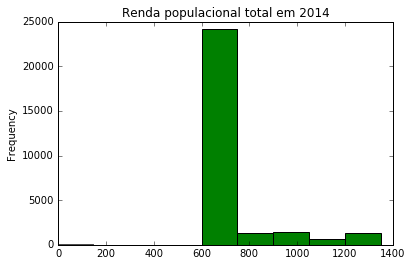

In [17]:
RendaAposentado2014 = dados2014[dados2014.V1252 < 999999999]
RendaHomens2014 = dados2014[(dados2014.V1252 < 999999999) & (dados2014.V0302 == "Masculino")]
RendaMulheres2014 = dados2014[(dados2014.V1252 < 999999999) & (dados2014.V0302 == "Feminino")]

faixa2014 = arange(0, 1500, 150)

plot = RendaAposentado2014.V1252.plot.hist(bins = faixa2014,color = 'green', title = "Renda populacional total em 2014")

#### Para diferenciar os homens das mulheres, plotamos o gráfico abaixo:

Nesse novo histograma é mostrado em verde a renda de todos os aposentados; em vermelho das mulheres; e em azul dos homens

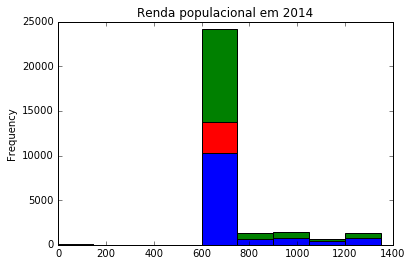

In [28]:
plot = RendaAposentado2014.V1252.plot.hist(bins = faixa2014,color = 'green', title = "Renda populacional em 2014", label = 'Total')
plot = RendaMulheres2014.V1252.plot.hist(bins = faixa2014, color = 'red', title = "Renda populacional em 2014", label = "Mulheres")
plot = RendaHomens2014.V1252.plot.hist(bins = faixa2014, color = 'blue', title = "Renda populacional em 2014", label = "oi" )

#### A seguir, foi realizado a mesma plotagem da renda dos aposentado, mas de 2001

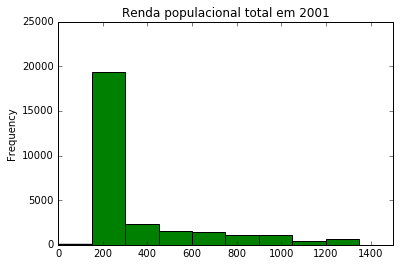

In [62]:
RendaAposentado2001 = dados2001[dados2001.v1252 < 999999999]
RendaHomens2001 = dados2001[(dados2001.v1252 < 999999999) & (dados2001.v0302 == "Masculino")]
RendaMulheres2001 = dados2001[(dados2001.v1252 < 999999999) & (dados2001.v0302 == "Feminino")]

faixa2014 = arange(0, 1500, 150)

plot = RendaAposentado2001.v1252.plot.hist(bins = faixa2014,color = 'green', title = "Renda populacional total em 2001")
plot.axis([0,1500,0,25000])
plt.show()

#### Abaixo está a distribuição de renda dos aposentados em renda total, renda feminina e renda masculina

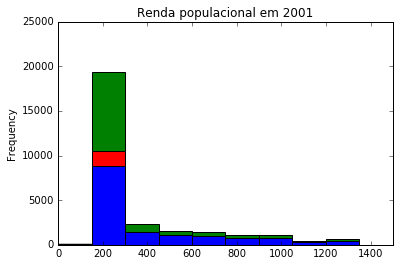

In [63]:
plot = RendaAposentado2001.v1252.plot.hist(bins = faixa2014,color = 'green', title = "Renda populacional em 2001")
plot = RendaMulheres2001.v1252.plot.hist(bins = faixa2014, color = 'red', title = "Renda populacional em 2001")
plot = RendaHomens2001.v1252.plot.hist(bins = faixa2014, color = 'blue', title = "Renda populacional em 2001")
plot.axis([0,1500,0,25000])
plt.show()

___
## Conclusão 

Podemos notar que o número de aposentados empregados de 2001 para 2014 diminuiu. Pela análise das rendas, percebemos que de 2001 para 2014 a renda dos aposentados subiu de um modo expressivo. Sendo talvez esse aumento de renda um possivel fator para a diminuição da população de aposentados empregados em 2014.

Comparando os aposentados masculinos aos femininos, notamos que os homens são a maioria empregadas nos trabalhos (cerca de 66%), sendo as mulheres mais presentes em trabalhos domésticos e de uso domiciliar. Pelo gráfico de barras que indica a renda, notamos que as mulheres recebem menos que os homens, pois na faixa de 200 a 300 reais (em 2001) elas estâo em maioria, nas demais faixa esse fenômeno não ocorre. Em 2014 temos esse mesmo efeito, porém para a faixa de 600 a 800 reais.

### Em geral dos dados aqui analisados, a progressão do ano de 2001 para 2014 foi satisfatória em todas as variáveis. 